# Bike-sharing rental

Dataset Dictionary:
 
- Instant --> Index number  
- Dteday --> Date (Format: YYYY-MM-DD)  
- Season --> Season Name  
- Yr --> Year  
- Month --> Month (1-12)(Jan-Dec)  
- Hr --> Hour(0 to 23)  
- Holiday --> Whether the holiday is there or not  
- Weekday --> Day of the week  
- Workingday --> Whether it is a working day or not  
- Weathersit --> Weather situation  
- Temp --> Normalized temperature in Celsius  
- Atemp --> Normalized feeling temperature  
- Hum --> Normalized humidity. The Values are divided by 100  
- Windspeed --> Normalized Wind speed. Values are divided by 67  
- Casual --> Count of casual users  
- Registered --> Number of registered users  
- Cnt --> Count of total rental biked including both casual and registered  


## The objective of this project is 
#### *To build a predictive model that can accurately forecast the demand for bike rentals based on various factors such as time of day, weather conditions, holidays, and other relevant factors.*

### The steps that will be followed to carry out this project are as follows:

1. **Data Collection:**   
        Collect the data from various sources such as bike-sharing companies, weather stations, and other relevant sources. [Already Provided]

2. **Data Cleaning and Preparation:**   
        Perform data cleaning and preparation tasks such as     
            - Imputing missing values    
            - handling outliers    
            - transforming data to make it suitable for analysis.    

3. **Exploratory Data Analysis (EDA):**    
        - Conduct exploratory data analysis to gain insights into the data with visualization like scatter plots and bar plots.   
        - Finding the correlation between the features and how they influence they other features.  
        - Also identify patterns and relationships, and select relevant features.

4. **Feature Engineering:**       
        Select features from the existing ones that may help in improving the predictive power of the model.

5. **Model Building:**   
        Build machine learning models using various algorithms such as   
            - linear regression  
            - decision trees  
            - random forest  
            - neural networks.  

6. **Model Evaluation:**   
        Evaluate the performance of the model using various metrics such as   
            - mean squared error (MSE)   
            - mean absolute error (MAE)   
            - R-squared.  

7. **Model Tuning:**   
        Fine-tune the model by adjusting hyperparameters to improve its performance.

8. **Deployment:**   
        Deploy the model to production and monitor its performance over time.

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv
bike=pd.read_csv("bike_rent.csv")
bike

instant      dteday    season    yr mnth  hr holiday  weekday  \
0            1  01-01-2011  springer  2011    1   0      No        6   
1            2  01-01-2011  springer  2011    1   1      No        6   
2            3  01-01-2011  springer  2011    1   2      No        6   
3            4  01-01-2011  springer  2011    1   3      No        6   
4            5  01-01-2011  springer  2011    1   4      No        6   
...        ...         ...       ...   ...  ...  ..     ...      ...   
17374    17375  31-12-2012  springer  2012   12  19      No        1   
17375    17376  31-12-2012  springer  2012   12  20      No        1   
17376    17377  31-12-2012  springer  2012   12  21      No        1   
17377    17378  31-12-2012  springer  2012   12  22      No        1   
17378    17379  31-12-2012  springer  2012   12  23      No        1   

        workingday weathersit  temp   atemp   hum windspeed casual registered  \
0          No work      Clear  0.24  0.2879  0.81         0      3         13   
1          No work      Clear  0.22  0.2727   0.8         0      8         32   
2          No work      Clear  0.22  0.2727     ?         0      5         27   
3          No work      Clear  0.24  0.2879  0.75         0      3         10   
4          No work      Clear  0.24  0.2879  0.75         0      0          1   
...            ...        ...   ...     ...   ...       ...    ...        ...   
17374  Working Day       Mist  0.26  0.2576   0.6    0.1642     11        108   
17375  Working Day       Mist  0.26  0.2576   0.6    0.1642      8         81   
17376  Working Day      Clear     ?  0.2576   0.6    0.1642      7         83   
17377  Working Day      Clear  0.26  0.2727  0.56    0.1343     13         48   
17378            ?      Clear  0.26  0.2727  0.65    0.1343     12         37   

       cnt  
0       16  
1       40  
2       32  
3       13  
4        1  
...    ...  
17374  119  
17375   89  
17376   90  
17377   61  
17378   49  

[17379 rows x 17 columns]

##### Understanding the data

In [3]:
#Dropping the instant column since it is basically index
bike=bike.drop('instant', axis=1)
bike

dteday    season    yr mnth  hr holiday  weekday   workingday  \
0      01-01-2011  springer  2011    1   0      No        6      No work   
1      01-01-2011  springer  2011    1   1      No        6      No work   
2      01-01-2011  springer  2011    1   2      No        6      No work   
3      01-01-2011  springer  2011    1   3      No        6      No work   
4      01-01-2011  springer  2011    1   4      No        6      No work   
...           ...       ...   ...  ...  ..     ...      ...          ...   
17374  31-12-2012  springer  2012   12  19      No        1  Working Day   
17375  31-12-2012  springer  2012   12  20      No        1  Working Day   
17376  31-12-2012  springer  2012   12  21      No        1  Working Day   
17377  31-12-2012  springer  2012   12  22      No        1  Working Day   
17378  31-12-2012  springer  2012   12  23      No        1            ?   

      weathersit  temp   atemp   hum windspeed casual registered  cnt  
0          Clear  0.24  0.2879  0.81         0      3         13   16  
1          Clear  0.22  0.2727   0.8         0      8         32   40  
2          Clear  0.22  0.2727     ?         0      5         27   32  
3          Clear  0.24  0.2879  0.75         0      3         10   13  
4          Clear  0.24  0.2879  0.75         0      0          1    1  
...          ...   ...     ...   ...       ...    ...        ...  ...  
17374       Mist  0.26  0.2576   0.6    0.1642     11        108  119  
17375       Mist  0.26  0.2576   0.6    0.1642      8         81   89  
17376      Clear     ?  0.2576   0.6    0.1642      7         83   90  
17377      Clear  0.26  0.2727  0.56    0.1343     13         48   61  
17378      Clear  0.26  0.2727  0.65    0.1343     12         37   49  

[17379 rows x 16 columns]

In [4]:
#obtaining the info of the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      17379 non-null  object
 1   season      17379 non-null  object
 2   yr          17379 non-null  object
 3   mnth        17379 non-null  object
 4   hr          17379 non-null  int64 
 5   holiday     17379 non-null  object
 6   weekday     17379 non-null  int64 
 7   workingday  17379 non-null  object
 8   weathersit  17379 non-null  object
 9   temp        17379 non-null  object
 10  atemp       17379 non-null  object
 11  hum         17379 non-null  object
 12  windspeed   17379 non-null  object
 13  casual      17379 non-null  object
 14  registered  17379 non-null  object
 15  cnt         17379 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 2.1+ MB


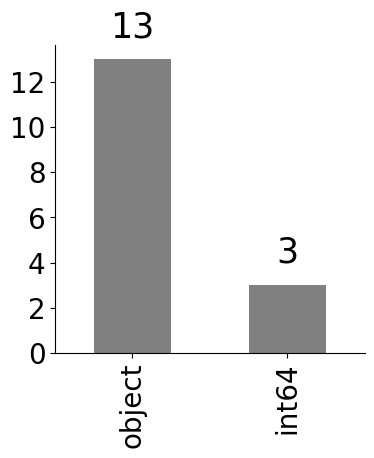

In [5]:
#visual representation of different data types in the dataframe
plt.figure(figsize = (4,4))
ax = bike.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

In [6]:
#checking for column wise null values in the dataframe
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#knowing the number of rows and columns
bike.shape

(17379, 16)

In [8]:
#Statistical description for the column type objects
bike.describe()

hr       weekday           cnt
count  17379.000000  17379.000000  17379.000000
mean      11.546752      3.003683    189.463088
std        6.914405      2.005771    181.387599
min        0.000000      0.000000      1.000000
25%        6.000000      1.000000     40.000000
50%       12.000000      3.000000    142.000000
75%       18.000000      5.000000    281.000000
max       23.000000      6.000000    977.000000

In [9]:
#checking for duplicated values 
sum(bike.duplicated())

0

There are no duplicated rows in the dataframe.

In [10]:
#Counting the unique values
for column in bike.columns:
    print(column,'\n',bike[column].value_counts())

dteday 
 01-01-2011    24
03-04-2012    24
28-04-2012    24
29-04-2012    24
30-04-2012    24
              ..
26-01-2011    16
18-01-2011    12
30-10-2012    11
27-01-2011     8
29-10-2012     1
Name: dteday, Length: 731, dtype: int64
season 
 fall        4496
summer      4409
springer    4236
winter      4232
?              6
Name: season, dtype: int64
yr 
 2012    8734
2011    8644
?          1
Name: yr, dtype: int64
mnth 
 5     1488
7     1488
12    1482
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
?        1
Name: mnth, dtype: int64
hr 
 17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
holiday 
 No     16878
Yes      500
?          1
Name: holiday, dtype: int64
weekday 
 6    2512
0    2502
5    2487
1    2479
3    2

In [11]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in bike.columns:
    print('{} : {}'.format(col,bike[col].unique()))

dteday : ['01-01-2011' '02-01-2011' '03-01-2011' '04-01-2011' '05-01-2011'
 '06-01-2011' '07-01-2011' '08-01-2011' '09-01-2011' '10-01-2011'
 '11-01-2011' '12-01-2011' '13-01-2011' '14-01-2011' '15-01-2011'
 '16-01-2011' '17-01-2011' '18-01-2011' '19-01-2011' '20-01-2011'
 '21-01-2011' '22-01-2011' '23-01-2011' '24-01-2011' '25-01-2011'
 '26-01-2011' '27-01-2011' '28-01-2011' '29-01-2011' '30-01-2011'
 '31-01-2011' '01-02-2011' '02-02-2011' '03-02-2011' '04-02-2011'
 '05-02-2011' '06-02-2011' '07-02-2011' '08-02-2011' '09-02-2011'
 '10-02-2011' '11-02-2011' '12-02-2011' '13-02-2011' '14-02-2011'
 '15-02-2011' '16-02-2011' '17-02-2011' '18-02-2011' '19-02-2011'
 '20-02-2011' '21-02-2011' '22-02-2011' '23-02-2011' '24-02-2011'
 '25-02-2011' '26-02-2011' '27-02-2011' '28-02-2011' '01-03-2011'
 '02-03-2011' '03-03-2011' '04-03-2011' '05-03-2011' '06-03-2011'
 '07-03-2011' '08-03-2011' '09-03-2011' '10-03-2011' '11-03-2011'
 '12-03-2011' '13-03-2011' '14-03-2011' '15-03-2011' '16-03-2011'
 

##### Data cleaning & Data pre-processing

Here we can see that there are few missing values that are in special characters(?). We are first going to replace that with the nan using numpy array and then fill them with reference to the skewness of the column.

In [12]:
#replacing the special characters that are present in the dataframe with nan
for col in bike.columns:
    bike[col].replace({'?':np.nan},inplace=True)
bike.head()

dteday    season    yr mnth  hr holiday  weekday workingday weathersit  \
0  01-01-2011  springer  2011    1   0      No        6    No work      Clear   
1  01-01-2011  springer  2011    1   1      No        6    No work      Clear   
2  01-01-2011  springer  2011    1   2      No        6    No work      Clear   
3  01-01-2011  springer  2011    1   3      No        6    No work      Clear   
4  01-01-2011  springer  2011    1   4      No        6    No work      Clear   

   temp   atemp   hum windspeed casual registered  cnt  
0  0.24  0.2879  0.81         0      3         13   16  
1  0.22  0.2727   0.8         0      8         32   40  
2  0.22  0.2727   NaN         0      5         27   32  
3  0.24  0.2879  0.75         0      3         10   13  
4  0.24  0.2879  0.75         0      0          1    1

In [13]:
bike.isnull().sum()

dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

Calculating the percentage of missing values

In [14]:
for col in bike.columns:
    pct_missing = (bike[col].isnull().sum() / len(bike)) * 100
    print(f"The % of missing values in {col} is {pct_missing:.2f}")

The % of missing values in dteday is 0.00
The % of missing values in season is 0.03
The % of missing values in yr is 0.01
The % of missing values in mnth is 0.01
The % of missing values in hr is 0.00
The % of missing values in holiday is 0.01
The % of missing values in weekday is 0.00
The % of missing values in workingday is 0.03
The % of missing values in weathersit is 0.02
The % of missing values in temp is 0.06
The % of missing values in atemp is 0.03
The % of missing values in hum is 0.03
The % of missing values in windspeed is 0.03
The % of missing values in casual is 0.01
The % of missing values in registered is 0.01
The % of missing values in cnt is 0.00


- The percentage of missing values is almost zero. So we can drop the missing values.
- We can also check the skewness and replace the missing numericals values with reference to that.
- If the data is normally distributed then we can use mean to replace the missing values if the data is skewed then we need to use the median to replace the missing numerical values.

In [15]:
#skewness and kurtosis for the numeric columns
col = bike.select_dtypes(exclude = 'object').columns.tolist()

data = bike[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()],index = ['skewness', 'kurtosis'])

hr   weekday       cnt
skewness -0.010680 -0.002998  1.277412
kurtosis -1.198021 -1.255997  1.417203

The missing value numerical columns has got minor skewness. So, here we will be using mean the fill the missing values.

In [16]:
#converting the columns to the formats they should be in and replacing the missing values using mean
num_col = ['yr', 'mnth',  'hr', 'weekday', 'temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in num_col:
    bike[col]=pd.to_numeric(bike[col])
    bike[col].fillna(bike[col].mean(), inplace=True)
bike.head()

dteday    season      yr  mnth  hr holiday  weekday workingday  \
0  01-01-2011  springer  2011.0   1.0   0      No        6    No work   
1  01-01-2011  springer  2011.0   1.0   1      No        6    No work   
2  01-01-2011  springer  2011.0   1.0   2      No        6    No work   
3  01-01-2011  springer  2011.0   1.0   3      No        6    No work   
4  01-01-2011  springer  2011.0   1.0   4      No        6    No work   

  weathersit  temp   atemp       hum  windspeed  casual  registered  cnt  
0      Clear  0.24  0.2879  0.810000        0.0     3.0        13.0   16  
1      Clear  0.22  0.2727  0.800000        0.0     8.0        32.0   40  
2      Clear  0.22  0.2727  0.627208        0.0     5.0        27.0   32  
3      Clear  0.24  0.2879  0.750000        0.0     3.0        10.0   13  
4      Clear  0.24  0.2879  0.750000        0.0     0.0         1.0    1

- For replacing the missing/NaN values in the categorical columns we can use the most frequent words i.e, mode to fill the missing values

In [17]:
#converting the columns to the formats they should be in and replacing the missing values using mode
cat_col = ['season', 'holiday', 'workingday', 'weathersit']
for col in cat_col:
    bike[col].fillna(bike[col].mode()[0], inplace=True)
bike.head()

dteday    season      yr  mnth  hr holiday  weekday workingday  \
0  01-01-2011  springer  2011.0   1.0   0      No        6    No work   
1  01-01-2011  springer  2011.0   1.0   1      No        6    No work   
2  01-01-2011  springer  2011.0   1.0   2      No        6    No work   
3  01-01-2011  springer  2011.0   1.0   3      No        6    No work   
4  01-01-2011  springer  2011.0   1.0   4      No        6    No work   

  weathersit  temp   atemp       hum  windspeed  casual  registered  cnt  
0      Clear  0.24  0.2879  0.810000        0.0     3.0        13.0   16  
1      Clear  0.22  0.2727  0.800000        0.0     8.0        32.0   40  
2      Clear  0.22  0.2727  0.627208        0.0     5.0        27.0   32  
3      Clear  0.24  0.2879  0.750000        0.0     3.0        10.0   13  
4      Clear  0.24  0.2879  0.750000        0.0     0.0         1.0    1

In [18]:
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
# Select columns of data type int64
int_cols = bike.select_dtypes(include='int64').columns.tolist()
print('Columns with data type int64:', int_cols)

# Select columns of data type object
obj_cols = bike.select_dtypes(include='object').columns.tolist()
print('Columns with data type object:', obj_cols)

# Select columns of data type bool
float_cols = bike.select_dtypes(include='float64').columns.tolist()
print('Columns with data type float64:', float_cols)

Columns with data type int64: ['hr', 'weekday', 'cnt']
Columns with data type object: ['dteday', 'season', 'holiday', 'workingday', 'weathersit']
Columns with data type float64: ['yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


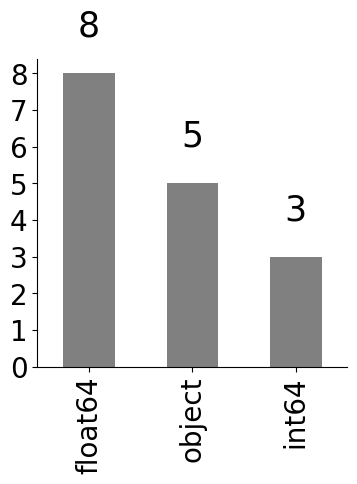

In [20]:
#visual representation of different data types in the dataframe after pre processing the data
plt.figure(figsize = (4,4))
ax = bike.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

In [21]:
#skewness and kurtosis for the numeric columns
col = bike.select_dtypes(exclude = 'object').columns.tolist()

data = bike[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()],index = ['skewness', 'kurtosis'])

yr      mnth        hr   weekday      temp     atemp  \
skewness -0.010359 -0.009212 -0.010680 -0.002998 -0.006991 -0.091034   
kurtosis -2.000065 -1.201726 -1.198021 -1.255997 -0.939674 -0.843831   

               hum  windspeed    casual  registered       cnt  
skewness -0.111151   0.574390  2.499218    1.557865  1.277412  
kurtosis -0.825354   0.591044  7.570946    2.750055  1.417203

After cleaning the data and bringing them to the correct format we have the data. Now we can go ahead with outlier detection and treating them

Here we are checking for the outliers in the given data using boxplot.

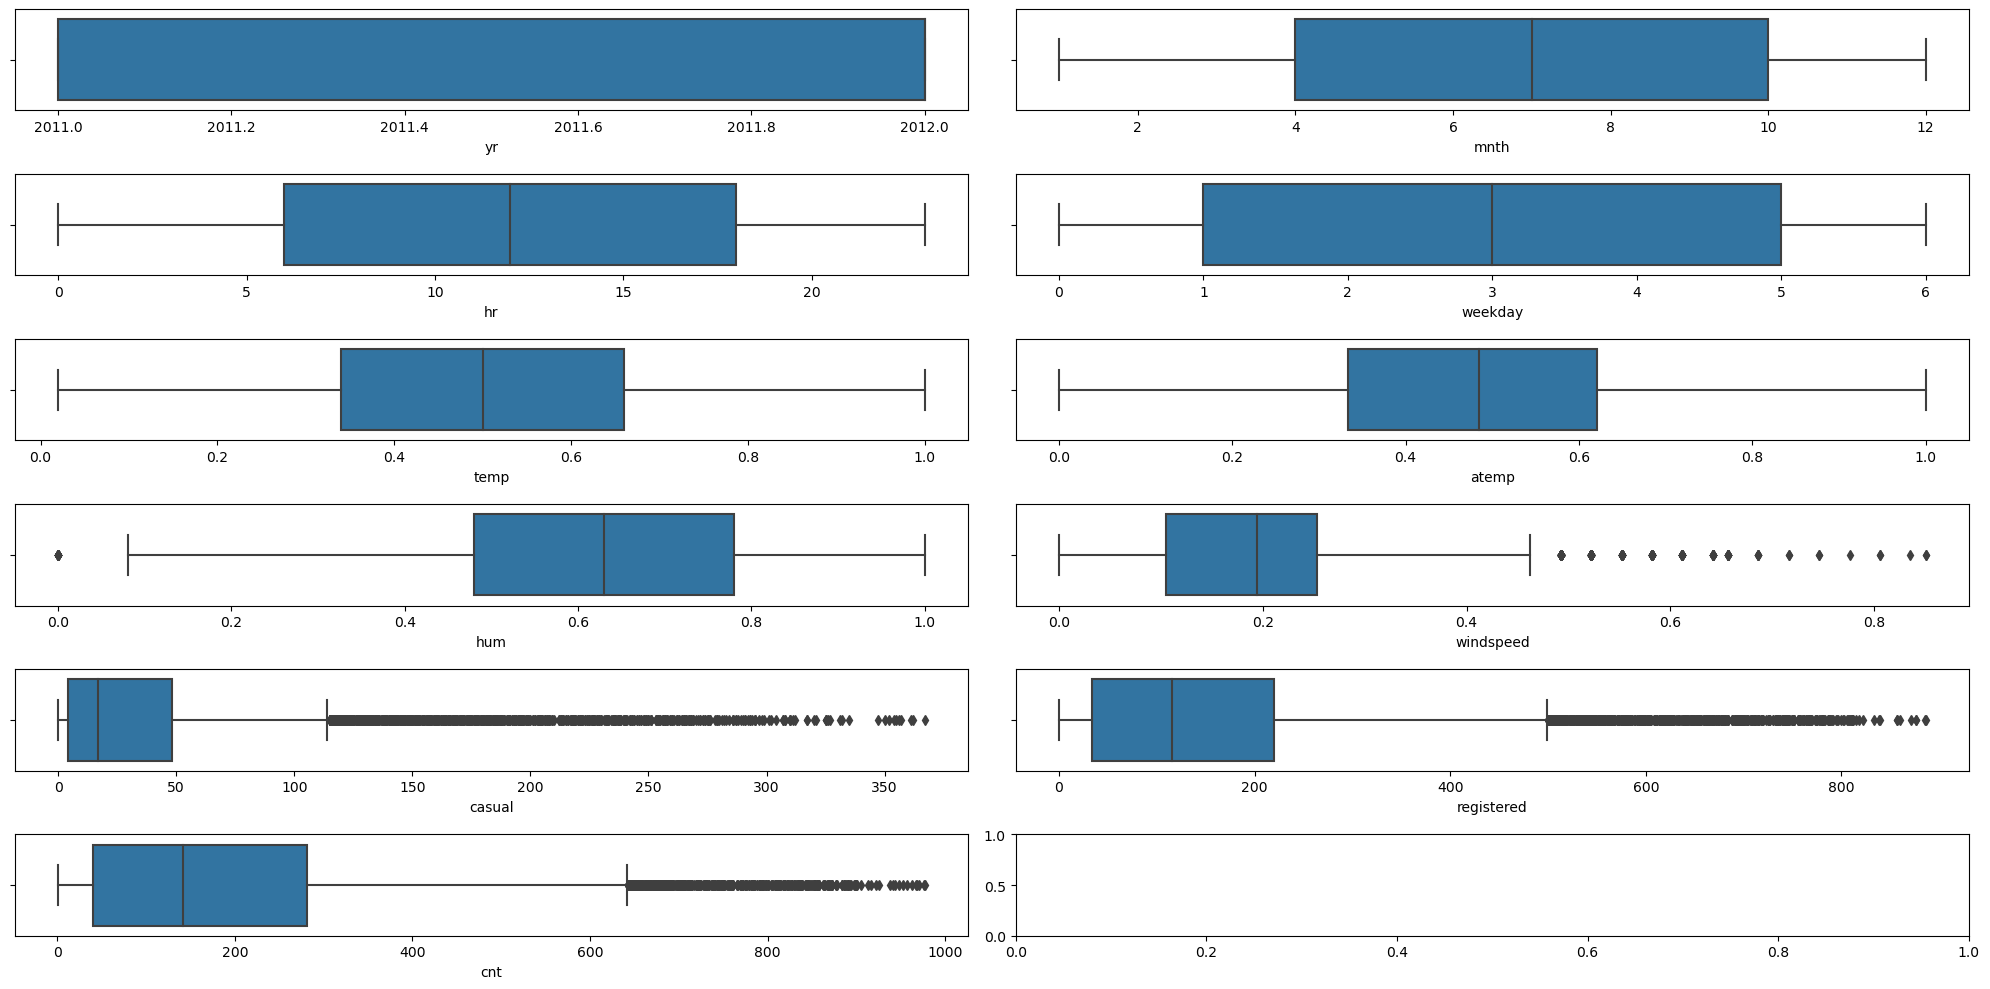

In [22]:
fig, ax = plt.subplots(6, 2, figsize=(20, 10))

attributes = ['yr', 'mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for i, attr in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.boxplot(x=bike[attr], ax=ax[row, col])

plt.tight_layout()
plt.show()

- We can see the outliers in the following columns of the data  
'hum', 'windspeed', 'casual', 'registered', 'cnt'

Below is the code for listing all the outliers in the data in the form of list for reference.

In [23]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(bike[item]))

Outliers: 

hum :  (array([1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561,
       1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572],
      dtype=int64),)
windspeed :  (array([  175,   178,   194,   196,   265,   271,   467,   468,   469,
         728,   729,   730,   731,   736,   861,   862,   863,   865,
         869,   870,   962,  1006,  1007,  1009,  1010,  1011,  1013,
        1014,  1015,  1017,  1018,  1019,  1105,  1107,  1110,  1117,
        1118,  1119,  1120,  1121,  1122,  1123,  1124,  1125,  1126,
        1127,  1130,  1131,  1132,  1136,  1137,  1138,  1258,  1259,
        1261,  1262,  1264,  1323,  1332,  1333,  1379,  1380,  1383,
        1384,  1389,  1475,  1477,  1482,  1483,  1568,  1611,  1767,
        1773,  1873,  2124,  2153,  2154,  2155,  2156,  2157,  2159,
        2167,  2171,  2172,  2177,  2181,  2184,  2200,  2321,  2322,
        2323,  2326,  2339,  2345,  2418,  2438,  2439,  2440,  2441,
        2443,  2465,  2551, 

##### Treating the outliers using Capping method

This process involves setting of outliers to the nearest value within the range of the upper and lower bounds.

In [24]:
# calculate upper and lower bounds using IQR
for attribute in ['hum', 'windspeed', 'casual', 'registered', 'cnt']:
    q1 = bike[attribute].quantile(0.25)
    q3 = bike[attribute].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    # cap values outside the range of the upper and lower bounds
    bike.loc[bike[attribute] < lower, attribute] = lower
    bike.loc[bike[attribute] > upper, attribute] = upper

- In this code, we're first calculating the upper and lower bounds for each of the specified columns using the IQR method. 
- Then, we're using pandas' loc function to select values in each column that fall outside the range of the upper and lower bounds, and setting those values to the nearest bound value. 
- This effectively "caps" the values and brings them within the range of the upper and lower bounds.

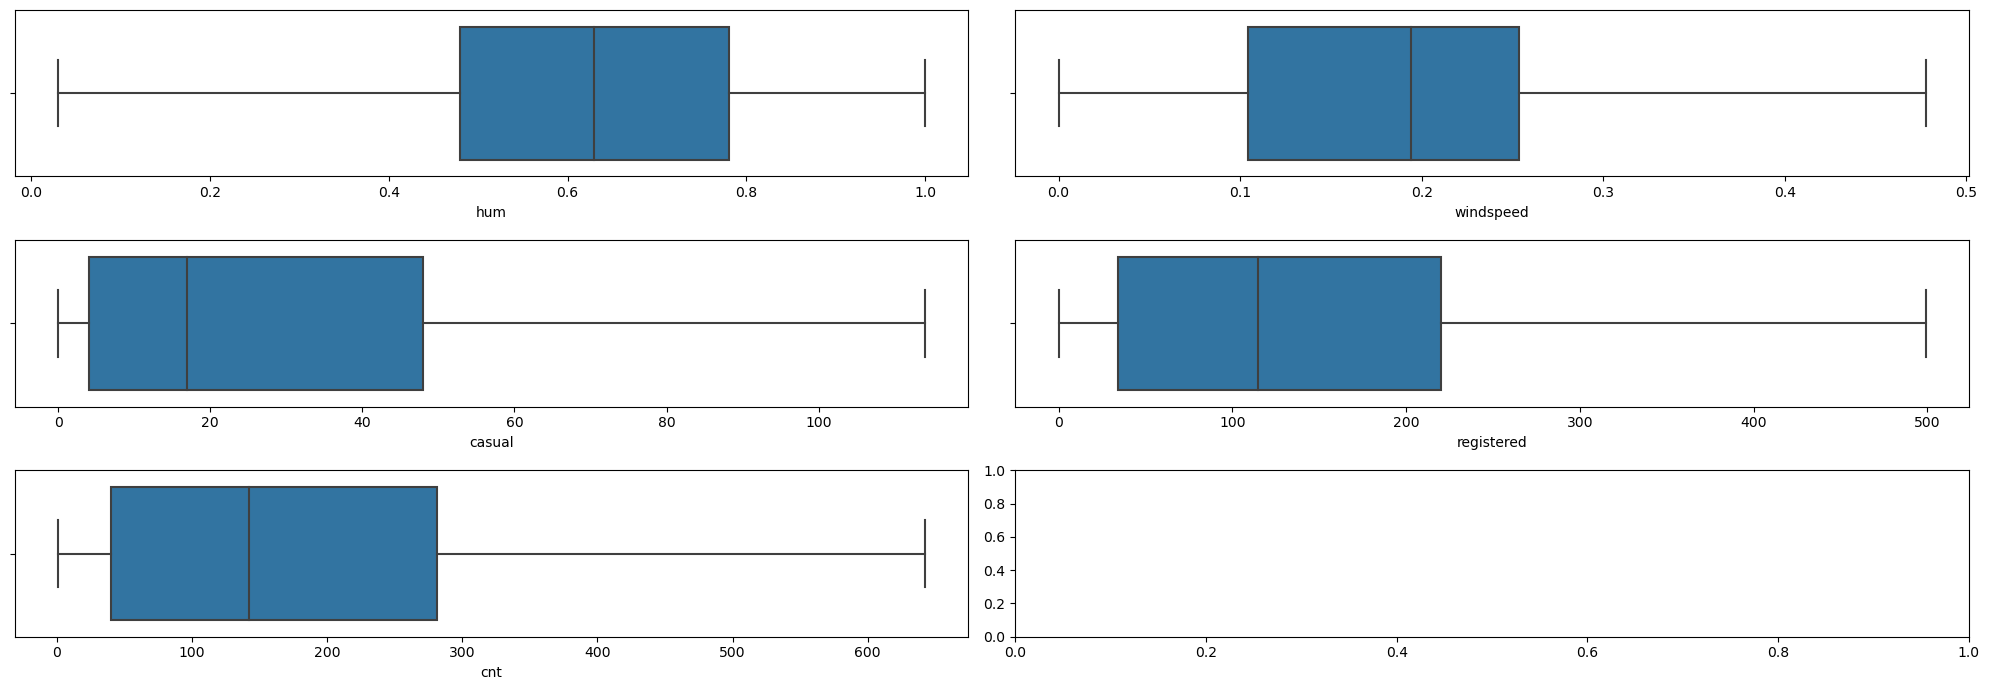

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(20, 7))

attributes = ['hum', 'windspeed', 'casual', 'registered', 'cnt']

for i, attr in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.boxplot(x=bike[attr], ax=ax[row, col])

plt.tight_layout()
plt.show()

In [26]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(bike[item]))

Outliers: 

hum :  (array([], dtype=int64),)
windspeed :  (array([], dtype=int64),)
casual :  (array([], dtype=int64),)
registered :  (array([], dtype=int64),)
cnt :  (array([], dtype=int64),)


Below is the visualization of univariant data distribution from the data set.

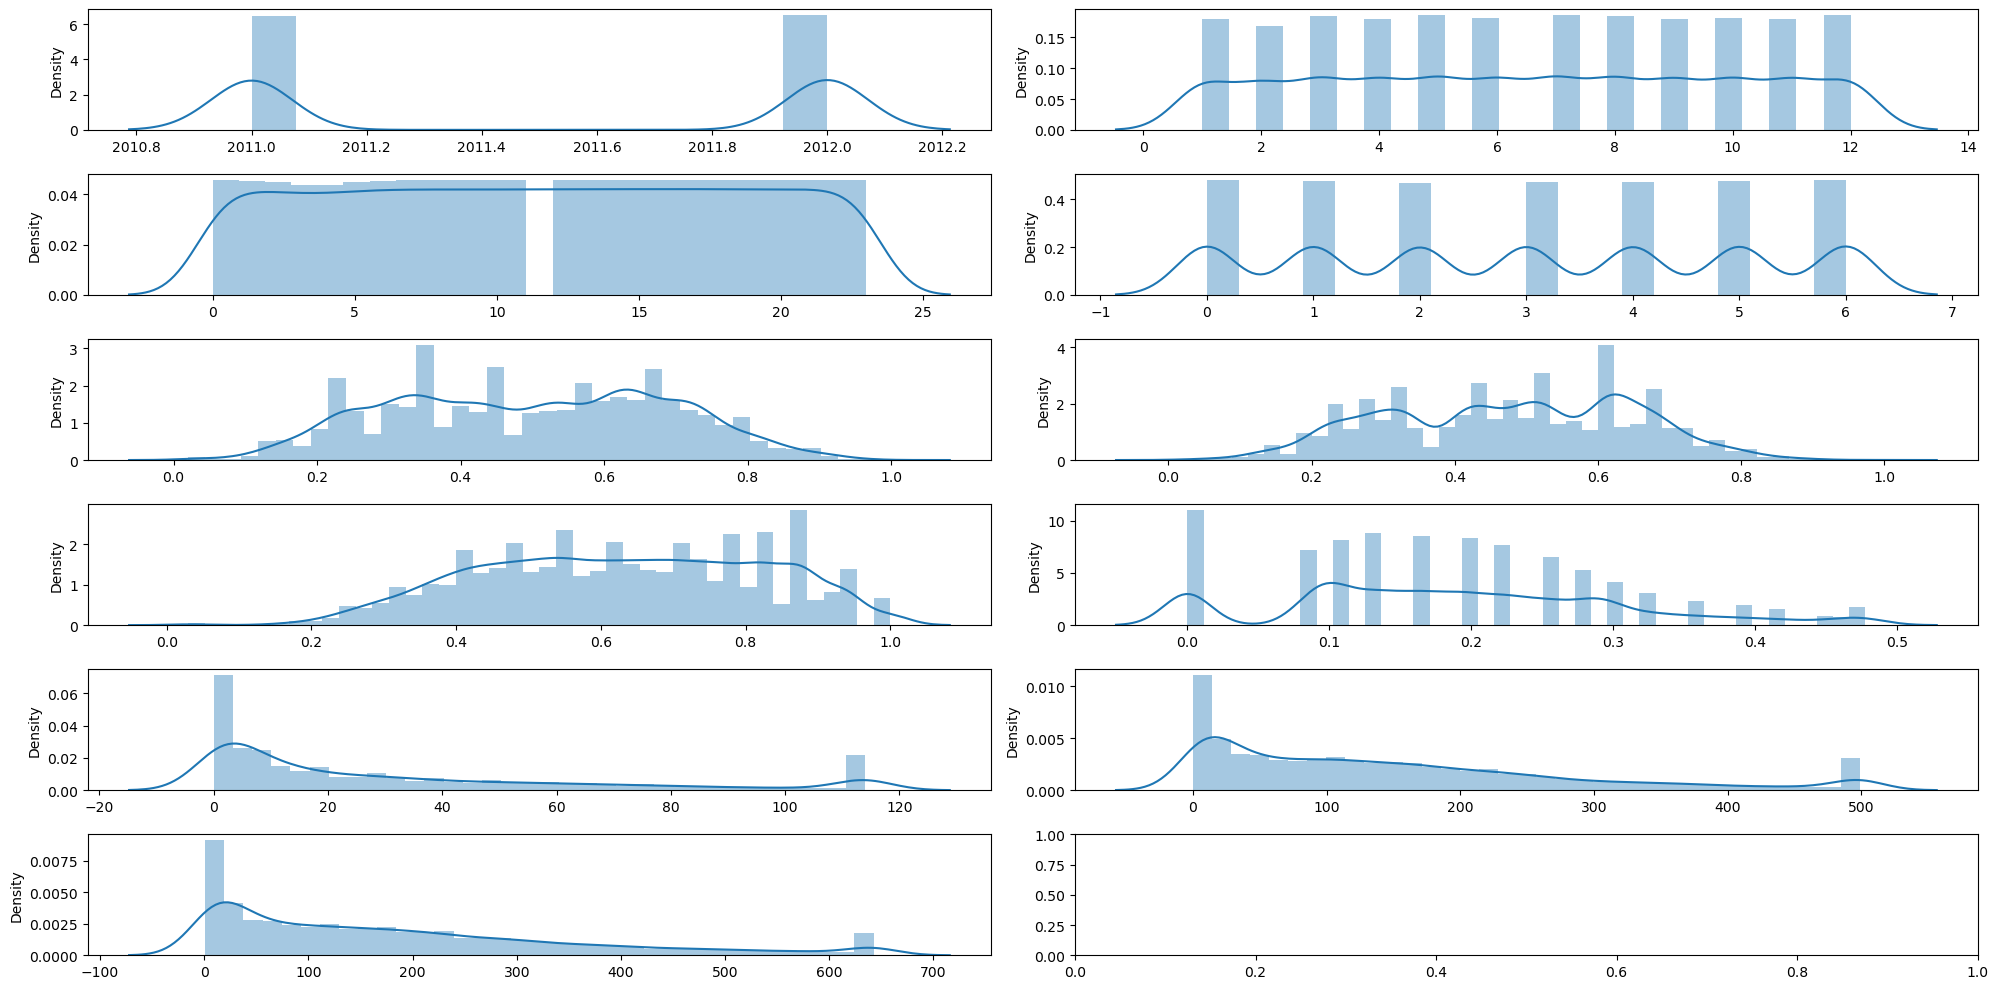

In [27]:
fig, ax = plt.subplots(6, 2, figsize=(20, 10))

attributes = ['yr', 'mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for i, attr in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.distplot(x=bike[attr], ax=ax[row, col])

plt.tight_layout()
plt.show()

##### Data visualization & EDA

In [28]:
#correlation
bike.corr().style.highlight_max()

<Axes: >

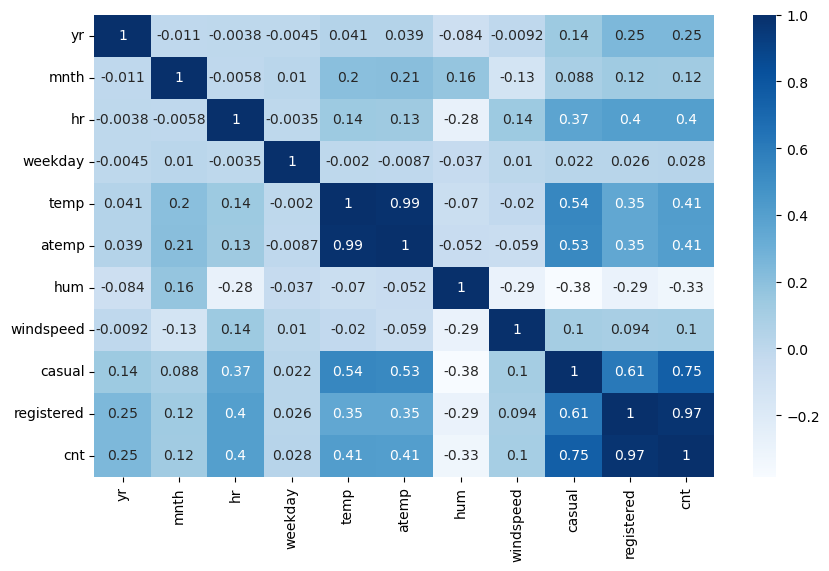

In [29]:
#correlation plot between the numerical values in the data frame
plt.figure(figsize=(10,6))
sns.heatmap(bike.corr(),cbar=True,annot=True,cmap='Blues')

### Correlation Conclusion

- There is a strong positive correlation between "registered" and "cnt" variables (0.97), which is expected since "cnt" is the sum of "registered" and "casual" variables.
- There is a positive correlation between "temp" and "atemp" variables (0.99), which is also expected since both variables represent temperature and are derived from the same source.
- There is a moderate positive correlation between "hr" and "cnt" variables (0.41), indicating that there is a tendency for higher bike rentals during certain hours of the day.
- There is a moderate positive correlation between "mnth" and "cnt" variables (0.12), indicating that there is a tendency for higher bike rentals during certain months of the year.
- There is a moderate negative correlation between "hum" and "cnt" variables (-0.34), indicating that there is a tendency for lower bike rentals when the humidity is high.
- There is a weak positive correlation between "yr" and "cnt" variables (0.24), indicating that there is a tendency for higher bike rentals in more recent years.
- There is a weak positive correlation between "casual" and "cnt" variables (0.76), indicating that the casual bike rentals contribute to the total bike rentals.
- There is a weak negative correlation between "hum" and "windspeed" variables (-0.29), indicating that there is a tendency for lower humidity when the windspeed is high

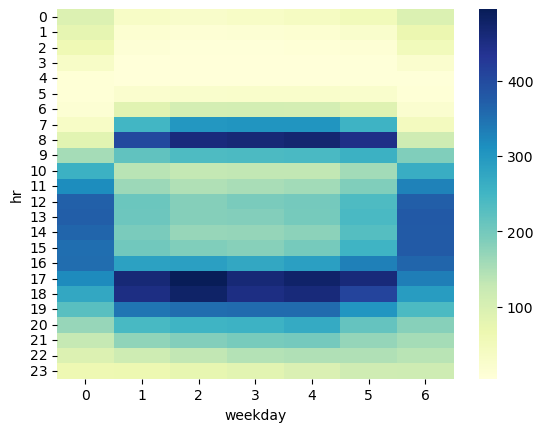

In [30]:
sns.heatmap(bike.pivot_table(index="hr", columns="weekday", values="cnt"), cmap="YlGnBu")
plt.show()

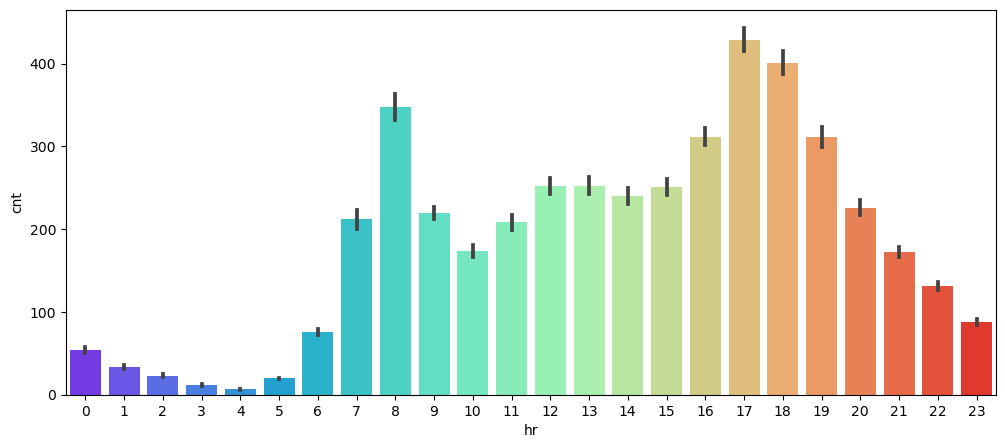

In [31]:
#Demand per hour
plt.figure(figsize=(12,5))
sns.barplot(data = bike, x = 'hr', y = 'cnt', palette = 'rainbow');

HeatMap and barplot tells us that the rental is more during the hours 8, 17, 18 followed by 7, 19 and durig the weekdays i.e, Mon to Fri the rental is high and during the weekends they are moderate

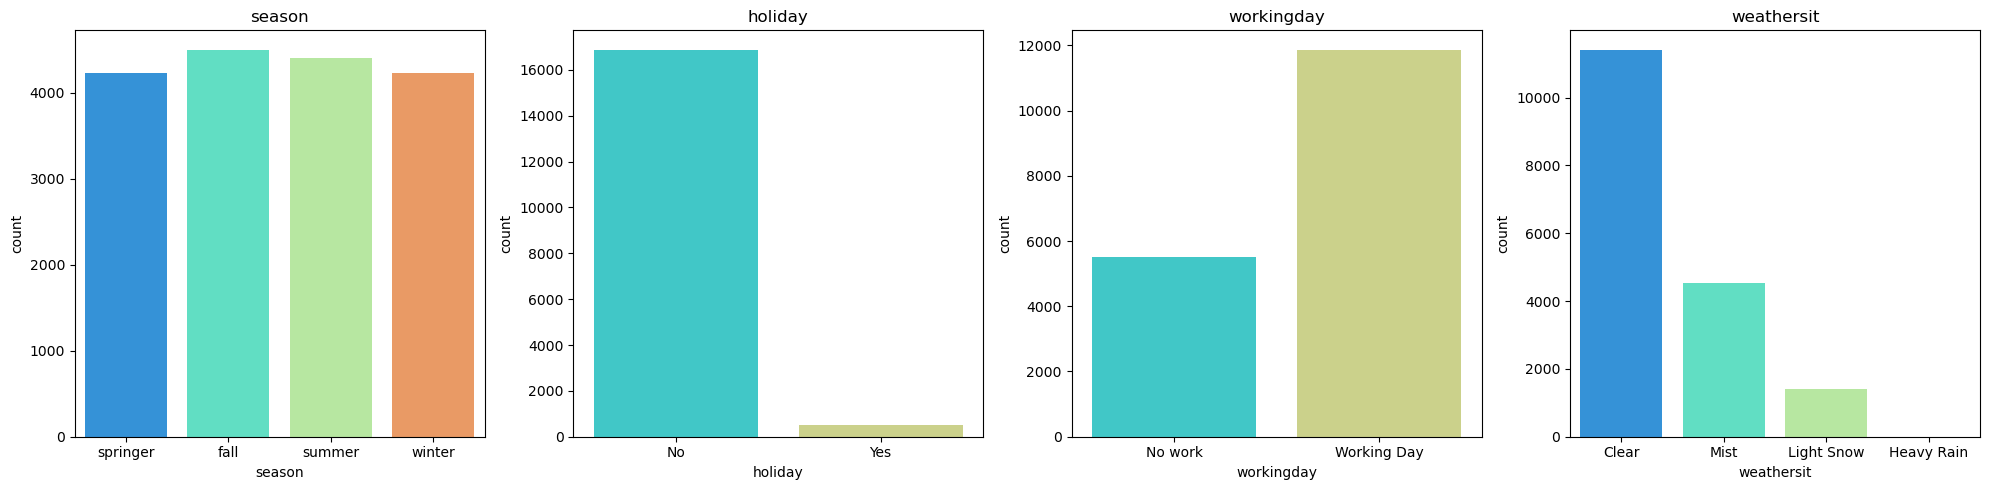

In [32]:
fig, axs = plt.subplots(ncols=4, figsize=(20,5))
for i, col in enumerate(['season', 'holiday', 'workingday', 'weathersit']):
    sns.countplot(x=col, data=bike, ax=axs[i], palette = 'rainbow')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

- Rental during fall is more followed by summer and winter
- We can see that when there is no holiday i.e, working day the bike rental count is more.
- When the weather is clear the rental is more and the rental is less during heavy rain.

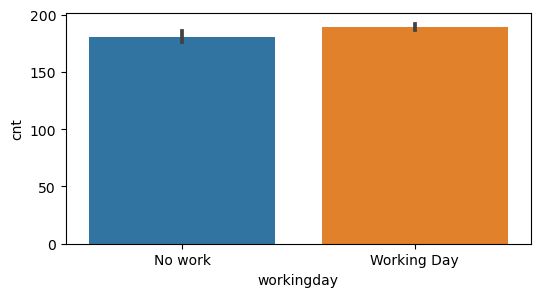

In [33]:
#Demand on working days
plt.figure(figsize=(6,3))
sns.barplot(data = bike, x = 'workingday', y = 'cnt');

We can see that whether it is a working day or not it doesn't affect the demand much as it remains almost the same both the time, therefore we will have to drop this column for getting better predictions from our linear regression model.

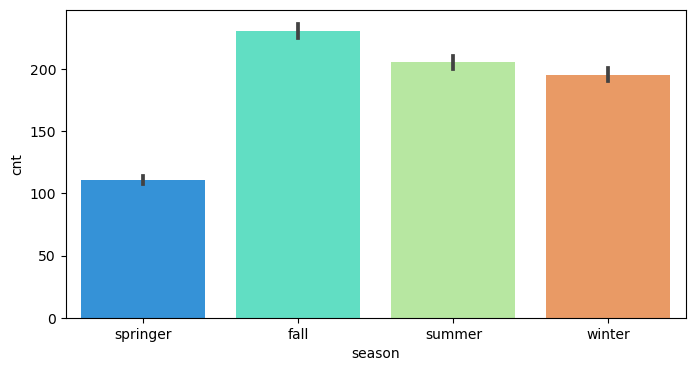

In [34]:
#Demand per season
plt.figure(figsize = (8,4))
sns.barplot(data = bike, x = 'season', y = 'cnt', palette = 'rainbow');

- This is a season wise data distribution that is present in the data set.
- As we have seen above the rental during fall is more followed by summer, spring and winter.

<Axes: ylabel='weathersit'>

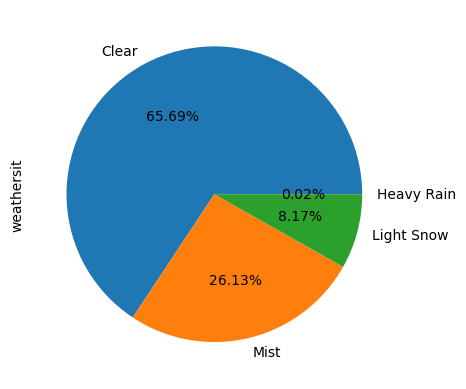

In [35]:
#pie chart showing the distribution of the "weathersit" variable in the "bike" dataframe
bike.weathersit.value_counts().plot(kind="pie",autopct='%1.2f%%')

- This pie chart tells us the bike rental percentage wrt the weather.
- Rental during the clear weather is more followed by mist and light snow.
- Rental during the rain is very less.

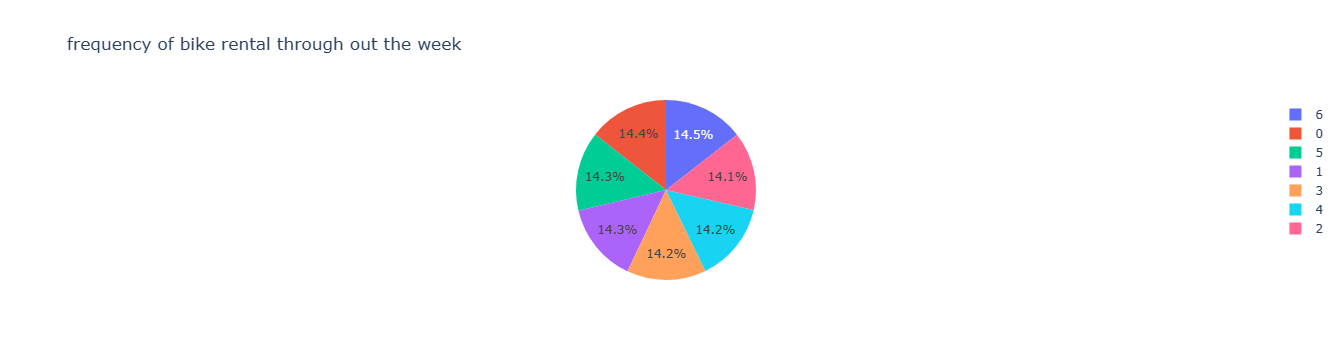

In [36]:
#pie chart showing the distribution of the "weathersit" variable in the "bike" dataframe
frequency_counts = bike['weekday'].value_counts()
fig = px.pie(values=frequency_counts, names=frequency_counts.index, 
             title='frequency of bike rental through out the week')
fig.show()

- Since the week days are mentioned in the numbers it is better to assume that 0 i.e, starting of the week is Sunday.
- From the pie plot we can tell that bike rentals during weekends i.e, Saturday's and Sunday's is more followed by the weekdays which are almost consistent.

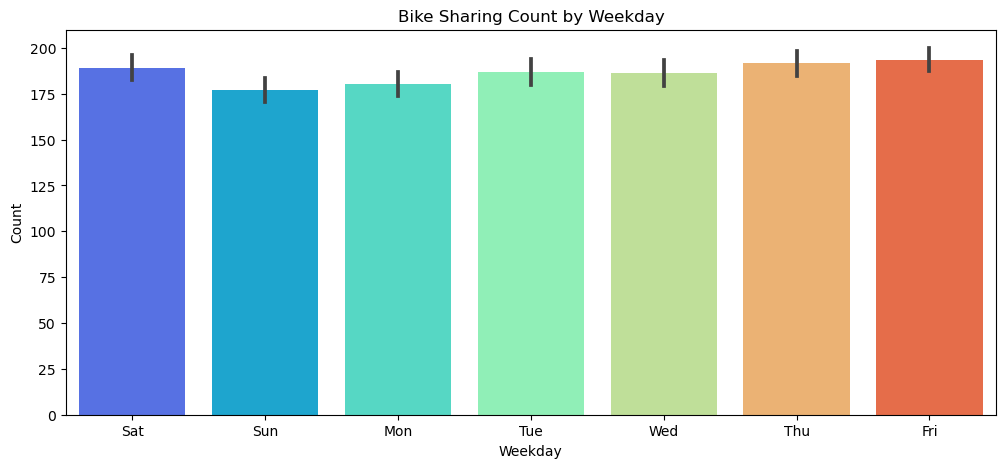

In [37]:
#Demand per day of the week

# Define a dictionary to map integer values to week names
day_dict = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}

# Map the integer values to month names
bike['week_name'] = bike['weekday'].map(day_dict)

#Create a bar plot with week names on the x-axis
plt.figure(figsize=(12,5))
sns.barplot(data=bike, x='week_name', y='cnt', palette='rainbow')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Bike Sharing Count by Weekday')
plt.show()

We can see that the demand of bike rentals were almost same for each day of the week. So this feature will not be useful in predicting the demand therefore we will have to drop this feature

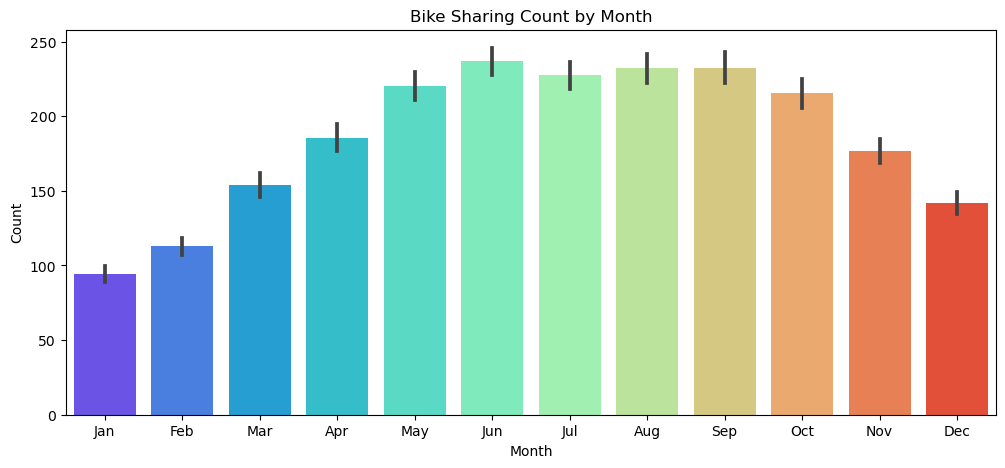

In [38]:
#Demand per month

# Define a dictionary to map integer values to month names
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# Map the integer values to month names
bike['month_name'] = bike['mnth'].map(month_dict)

# Create a bar plot with month names on the x-axis
plt.figure(figsize=(12,5))
sns.barplot(data=bike, x='month_name', y='cnt', palette='rainbow')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bike Sharing Count by Month')
plt.show()

In [39]:
bike=bike.drop(bike[['week_name', 'month_name']], axis = 1)

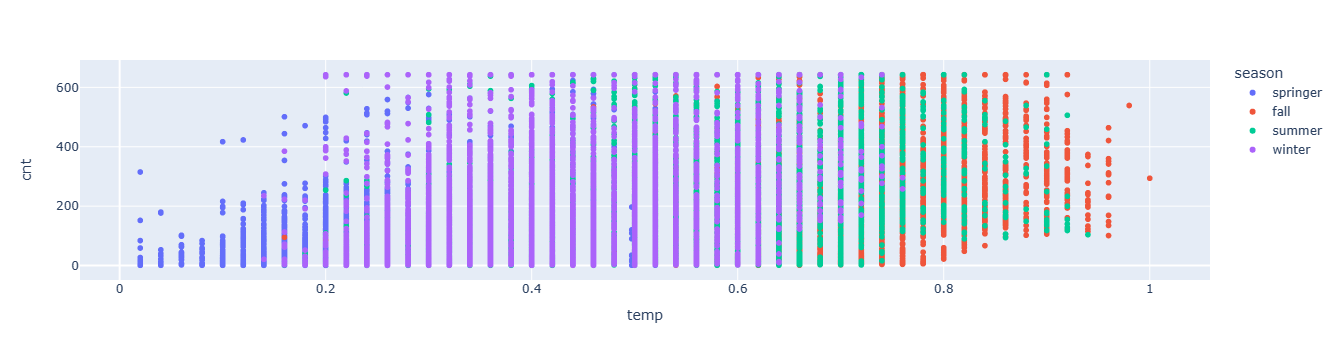

In [40]:
fig = px.scatter(bike, x="temp", y="cnt", color="season")
fig.show()

- The above plot shows the count of bike rental with respect to the summer and normalised temp.
- The highest rental count of 976 was in fall with normalized temp of 0.64
- The lowest rental count of 1 was during spring with normalized temp of 0.02

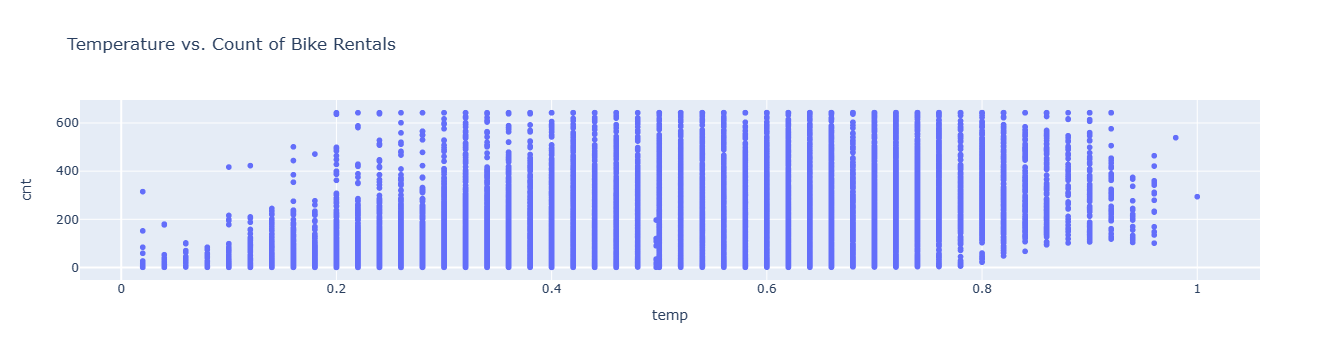

In [41]:
#scatter plot between "temp" and "cnt" columns:

fig = px.scatter(bike, x='temp', y='cnt', title='Temperature vs. Count of Bike Rentals')
fig.show()

- This scatter plot shows the count of bike rented with respect to the normalized temp.

#### Check colinearity between temp and atemp variables
We've seen that temp and atemp are highly correlated (0.99) so we need to check the relationship for anomalies and see which of the features to keep.

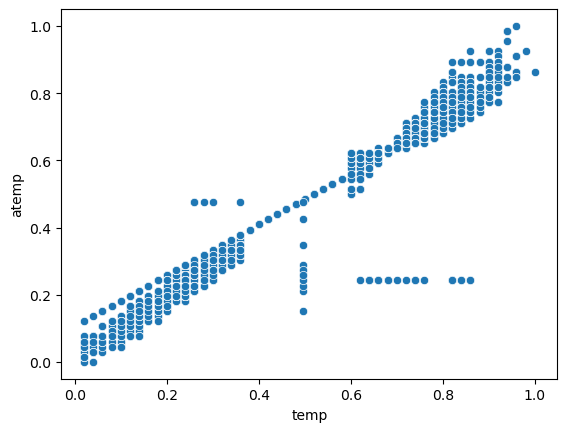

In [42]:
ax = sns.scatterplot(x="temp", y="atemp", data=bike)

It seems we have some anomalous values

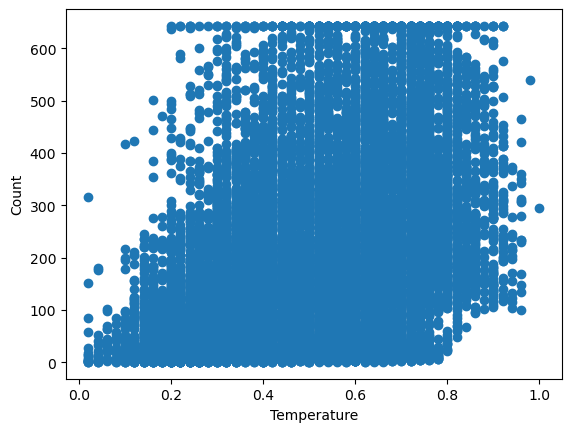

In [43]:
#Rental vs Temp
plt.scatter(bike["temp"], bike["cnt"])
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

We can say that as the temperature increases the demand also increases.

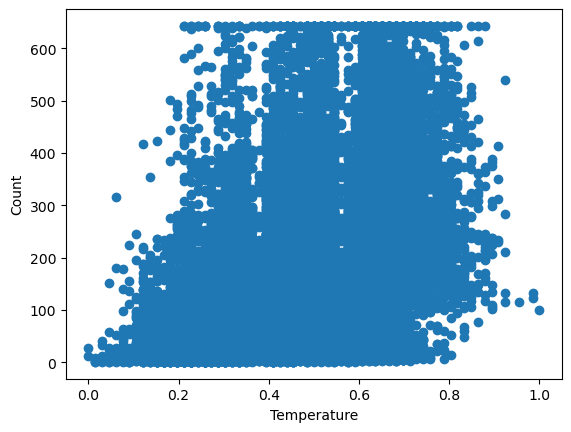

In [44]:
#Renatl vs Atemp
plt.scatter(bike["atemp"], bike["cnt"])
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

We can see that this plot is almost similar to the previous plot of temperature and demand which means there is a high correlation between temp and atemp features which is quite understandable.

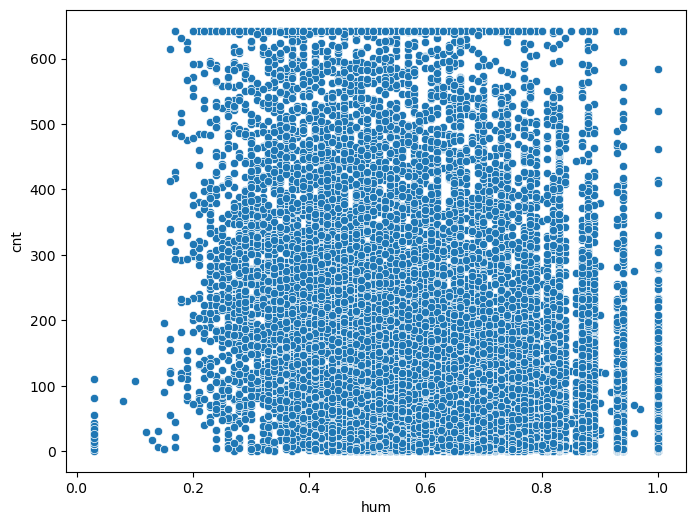

In [45]:
#Humidity vs Demand
plt.figure(figsize=(8,6))
sns.scatterplot(data = bike, x ='hum', y='cnt');

We can tell that the humidity is not much correlated to the demand.

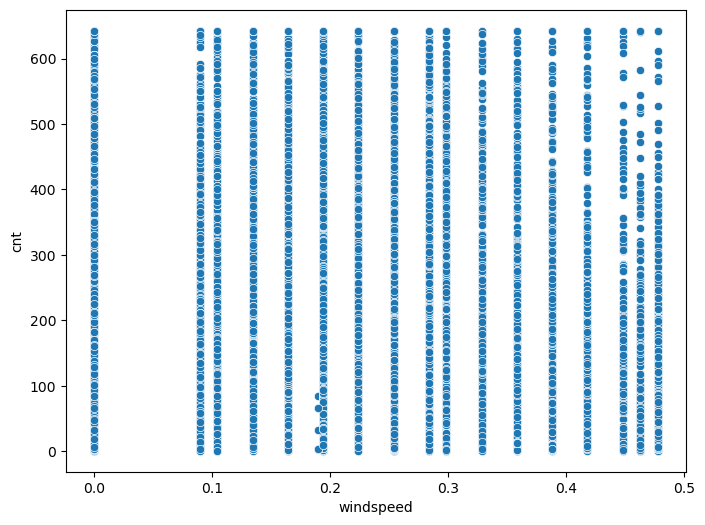

In [46]:
#Windspeed vs Demand
plt.figure(figsize=(8,6))
sns.scatterplot(data = bike, x = 'windspeed', y='cnt');

Since windspeed has a very low correlation with the demand so it does not affect the demand much.